## EDA Case Study - Analyse Bank Loan Defaults I

#### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##### Display Settings

In [2]:
#Set options to displau rows and columns fully
pd.set_option('display.max_info_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

# To Suppress warnings while assigning values to dataframe columns
pd.set_option('mode.chained_assignment', None)

## 1. Read and Inspect

In [3]:
# Read application data file.
df_ad = pd.read_csv('application_data.csv')

In [4]:
#Inspect the shape, number of rows, columns and their data types
print(df_ad.shape)
df_ad.info()

(307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null 

In [5]:
#Look at sample data by fetching first 5 rows
df_ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Inspect the statistics of numeric columns
df_ad.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## 2. Data Cleaning

### 2.1 Handle Null Values

#### Function get_null_perc to get null percentages

In [7]:
# This function takes a data frame as input 
# Returns a Series with percentage of null values in each column rounded to 2 decimals
def get_null_perc(df):
    return round( (df.isnull().sum()/len(df))*100,4 )

#### Function get_cols_min_null_perc to get columns of a dataframe  with a null percentage greater than or equal to the given percentage

In [8]:
# This function takes a dataframe and a percentage value as input.
# Returns a list of columns which has more than the given percentage of null values
def get_cols_min_null_perc(df, perc):
    s = get_null_perc(df)
    cols = [k for k,v in s.items() if (v >= perc)]
    return cols

#### Function drop_cols_df to drop columns from a dataframe.

In [9]:
# This function takes a dataframe and list of columns to be dropped from it
# Drops all the columns in place. Doesn't return any value
def drop_cols_df(df, cols):
    print('Dropping following ', len(cols),' Columns :')
    print(*cols, sep = '\n')
    df.drop(labels=cols, axis=1, inplace=True)

In [10]:
# Inspect null percentages of all columns
get_null_perc(df_ad)

SK_ID_CURR                       0.0000
TARGET                           0.0000
NAME_CONTRACT_TYPE               0.0000
CODE_GENDER                      0.0000
FLAG_OWN_CAR                     0.0000
FLAG_OWN_REALTY                  0.0000
CNT_CHILDREN                     0.0000
AMT_INCOME_TOTAL                 0.0000
AMT_CREDIT                       0.0000
AMT_ANNUITY                      0.0039
AMT_GOODS_PRICE                  0.0904
NAME_TYPE_SUITE                  0.4201
NAME_INCOME_TYPE                 0.0000
NAME_EDUCATION_TYPE              0.0000
NAME_FAMILY_STATUS               0.0000
NAME_HOUSING_TYPE                0.0000
REGION_POPULATION_RELATIVE       0.0000
DAYS_BIRTH                       0.0000
DAYS_EMPLOYED                    0.0000
DAYS_REGISTRATION                0.0000
DAYS_ID_PUBLISH                  0.0000
OWN_CAR_AGE                     65.9908
FLAG_MOBIL                       0.0000
FLAG_EMP_PHONE                   0.0000
FLAG_WORK_PHONE                  0.0000


##### Drop columns having more than 50% of nulls

In [11]:
# Function call to drop columns having more than 50% of null
drop_cols_df( df_ad, get_cols_min_null_perc(df_ad,50) )

Dropping following  41  Columns :
OWN_CAR_AGE
EXT_SOURCE_1
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE


##### Inspect the data frame after dropping the columns 

In [12]:
#Print info of application data frame
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [13]:
## Look at null percentages of columns having null values.
s = get_null_perc(df_ad)

#Print only columns having null values along with their null percentages
s.loc[s != 0]

AMT_ANNUITY                      0.0039
AMT_GOODS_PRICE                  0.0904
NAME_TYPE_SUITE                  0.4201
OCCUPATION_TYPE                 31.3455
CNT_FAM_MEMBERS                  0.0007
EXT_SOURCE_2                     0.2146
EXT_SOURCE_3                    19.8253
YEARS_BEGINEXPLUATATION_AVG     48.7810
FLOORSMAX_AVG                   49.7608
YEARS_BEGINEXPLUATATION_MODE    48.7810
FLOORSMAX_MODE                  49.7608
YEARS_BEGINEXPLUATATION_MEDI    48.7810
FLOORSMAX_MEDI                  49.7608
TOTALAREA_MODE                  48.2685
EMERGENCYSTATE_MODE             47.3983
OBS_30_CNT_SOCIAL_CIRCLE         0.3320
DEF_30_CNT_SOCIAL_CIRCLE         0.3320
OBS_60_CNT_SOCIAL_CIRCLE         0.3320
DEF_60_CNT_SOCIAL_CIRCLE         0.3320
DAYS_LAST_PHONE_CHANGE           0.0003
AMT_REQ_CREDIT_BUREAU_HOUR      13.5016
AMT_REQ_CREDIT_BUREAU_DAY       13.5016
AMT_REQ_CREDIT_BUREAU_WEEK      13.5016
AMT_REQ_CREDIT_BUREAU_MON       13.5016
AMT_REQ_CREDIT_BUREAU_QRT       13.5016


### 2.2. Imputing Null Values

#### Col #1 NAME_TYPE_SUITE (0.42% null values)

In [14]:
df_ad.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [15]:
df_ad.NAME_TYPE_SUITE.isnull().sum()

1292

In [16]:
df_ad.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

#### Impute NAME_TYPE_SUITE
This is a categorical column and most of the values are Unaccompanied for existing data. For categorical values, mode can be used to impute. There are only about 1000 null values out of 3 lakh. We can use mode ('Unaccompanied') which is a clear dominant value in the dataset to impute 

Hence, replace all nulls in NAME_TYPE_SUITE with 'Unaccompanied'

#### Col #2 AMT_GOODS_PRICE  (0.09% null values)

In [17]:
df_ad.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

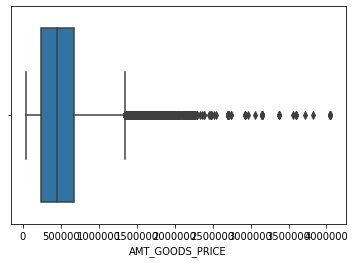

In [18]:
sns.boxplot(df_ad['AMT_GOODS_PRICE'])

In [19]:
df_ad.AMT_GOODS_PRICE.median()

450000.0

#### Impute AMT_GOODS_PRICE
As this is a continuous numeric variabele, we can either use mean or median to impute. From the box plot for AMT_GOODS_PRICE, we can observe there are extreme values, bunch of values can be seen above 75th quartile. Hence median of the data set is a good fit to impute.

Hemce, repalce all null with 450000.0 (Median)

#### Col #3 EXT_SOURCE_2 (0.21% null values)

In [20]:
df_ad.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

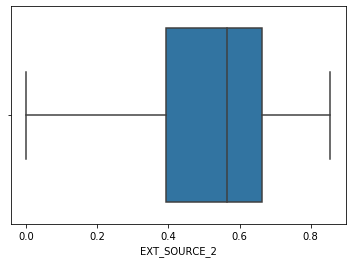

In [21]:
sns.boxplot(df_ad['EXT_SOURCE_2'])

In [22]:
df_ad.EXT_SOURCE_2.mean()

0.5143926741308463

#### Impute EXT_SOURCE_2
As this is a continuous numeric variabele, we can either use mean or median to impute. From the box plot for EXT_SOURCE_2, we can observe there are no extreme values. Hence mean of the data set is a good fit to impute.

Hemce, repalce all null with 0.5143926741308463 (Mean)

#### Col #4 OBS_30_CNT_SOCIAL_CIRCLE (0.33 null values)

In [23]:
df_ad.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [24]:
print('Mode:', df_ad.OBS_30_CNT_SOCIAL_CIRCLE.mode())
print('Median:', df_ad.OBS_30_CNT_SOCIAL_CIRCLE.median())

Mode: 0    0.0
dtype: float64
Median: 0.0


In [25]:
df_ad.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

#### Impute OBS_30_CNT_SOCIAL_CIRCLE
This is a numeric column, however it has discrete values which makes it close to categorical variable.  Most of the values are 0.0 for existing data. There are only about 1000 null values out of 3 lakh. For this data set, mode (0.0) is same as median which is a clear dominant value in the dataset to impute.

Hence, replace all nulls in OBS_30_CNT_SOCIAL_CIRCLE with 0.0

#### Col #5 -  AMT_REQ_CREDIT_BUREAU_DAY (With 13.5% null values)

In [26]:
# Print the unique values for this field - Number of enquiries to Credit Bureau about the client one day before application 
df_ad.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [27]:
# Number of null values
print('Null Values: ', df_ad.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum())
# Total number of values
print('Total Number of values: ', len(df_ad.AMT_REQ_CREDIT_BUREAU_DAY))

Null Values:  41519
Total Number of values:  307511


In [28]:
#Mode
df_ad.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

#### Impute AMT_REQ_CREDIT_BUREAU_DAY:
Out of 3 lakh values, about 40000 are nulls. Most of the non null values contain a 0.0. About 2.6 lakh values contain 0.0, hence it is safe to impute the null values as 0.0 which is also the mode for the given data set.¶

So, null values for AMT_REQ_CREDIT_BUREAU_DAY can be replaced with 0.0

#### Col #6-  AMT_REQ_CREDIT_BUREAU_YEAR (With 13.5% null values)

In [29]:
# Print the unique values for this field - Number of enquiries to Credit Bureau about the client one year before application 
df_ad.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [30]:
# Number of null values
print('Null Values: ', df_ad.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum())

# Total number of values
print('Total Number of values: ', len(df_ad.AMT_REQ_CREDIT_BUREAU_YEAR))

Null Values:  41519
Total Number of values:  307511


In [31]:
#As there is no single dominant value unlike AMT_REQ_CREDIT_BUREAU_YEAR columns
# Look at at the statistics
print(df_ad.AMT_REQ_CREDIT_BUREAU_YEAR.describe())
print()
print('Median:',df_ad.AMT_REQ_CREDIT_BUREAU_YEAR.median())

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

Median: 1.0


#### Impute AMT_REQ_CREDIT_BUREAU_YEAR:
Out of 3 lakh values, about 40000 are nulls. Most of the non null values contain a 0.0, 1.0 and 2.0. By looking at the statistics, it has a mean of 1.9. Also this column doesn't have many extreme values (outliers) and Median of 1.0 doesn't seem to be a good fit to impute as only about 25% of values contain 1.0. Hence we can use mean to impute. Since the number of enquiries cannot be decimal, we can take the mean as 2 and use it to impute the null values.

So, null values for AMT_REQ_CREDIT_BUREAU_YEAR can be replaced with 2.0

### 2.3 Subset of Data

In [32]:
# List of columns to do further analysis on the following subset.
cols = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 
       'CNT_FAM_MEMBERS', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [33]:
#Create a new data frame with the subset of columns
df = df_ad[cols]

In [34]:
#Inspect the new data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non

### 2.4 Data Types

Check the Data Types of all columns and change the data types if required

In [35]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
REG_REGION_NOT_LIVE_REGION      int64
REG_REGION_NOT_WORK_REGION      int64
ORGANIZATION_TYPE              object
EXT_SOURCE_2

In [36]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,-1134.0,0,1,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,0,0,School,0.622246,NaN,1.0,-828.0,0,1,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,0,0,Government,0.555912,0.729567,0.0,-815.0,0,0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,0,0,Business Entity Type 3,0.650442,NaN,2.0,-617.0,0,1,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,0,0,Religion,0.322738,NaN,0.0,-1106.0,0,0,0.0,0.0


#### Convert DAYS_REGISTRATION from float to integer as it represents the number of days and it cannot be in decimal

In [37]:
df.DAYS_REGISTRATION = df.DAYS_REGISTRATION.astype(dtype='int')

#### Convert CNT_FAM_MEMBERS from float to integer as it represents the number of days and it cannot be in decimal

In [38]:
#Fill NaNs with -1 before converting the type. There are 2 NaNs
df.CNT_FAM_MEMBERS = df.CNT_FAM_MEMBERS.fillna(-1) 
df.CNT_FAM_MEMBERS = df.CNT_FAM_MEMBERS.astype('int64')

#### Convert REG_REGION_NOT_LIVE_REGION and REG_REGION_NOT_WORK_REGION from integer to object as it is a categorical variable

In [39]:
df.REG_REGION_NOT_LIVE_REGION = df.REG_REGION_NOT_LIVE_REGION.astype(str)
df.REG_REGION_NOT_WORK_REGION = df.REG_REGION_NOT_WORK_REGION.astype(str)
df.OBS_30_CNT_SOCIAL_CIRCLE = df.OBS_30_CNT_SOCIAL_CIRCLE.astype(str)

#### Convert AMT_REQ_CREDIT_BUREAU_MON and AMT_REQ_CREDIT_BUREAU_YEAR from float to integer as it indicates number of enquiries which cannot be decimal

In [40]:
#Fill Nas with -1 before converting the type
df.AMT_REQ_CREDIT_BUREAU_MON = df.AMT_REQ_CREDIT_BUREAU_MON.fillna(-1) 
df.AMT_REQ_CREDIT_BUREAU_MON = df.AMT_REQ_CREDIT_BUREAU_MON.astype('int')

#Fill Nas with -1 before converting the type
df.AMT_REQ_CREDIT_BUREAU_YEAR = df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(-1) 
df.AMT_REQ_CREDIT_BUREAU_YEAR = df.AMT_REQ_CREDIT_BUREAU_YEAR.astype('int')

#### Introduce a column for indicating Target variable as Default - Yes or No

In [41]:
#Add a flag to indicate Default as YES or NO
df['FLAG_DEFAULT'] = df.TARGET.apply(lambda x: 'YES' if x == 1 else 'NO')

In [42]:
#Inspect the newly added column
df.FLAG_DEFAULT.describe()

count     307511
unique         2
top           NO
freq      282686
Name: FLAG_DEFAULT, dtype: object

### 2.4 Handle Outliers

Outliers can be identified using box plots for numerical variables

In [43]:
#Print list of numeric columns
df.select_dtypes(include=np.number).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [44]:
#Function to draw one dimensional box plots for the given data frame and list of columns
def draw_box_plots_1d(df,  num_cols):
    rows = (len(num_cols)/2)+len(num_cols)%2
    plt.figure(figsize=(12,rows*4))
    plt.plot(rows,2,rows*2)
    i=0
    for num_col in num_cols:
        i = i+1
        plt.subplot(rows,2,i)
        sns.boxplot(data=df[num_col],orient='h', palette="Set2")
    plt.show()

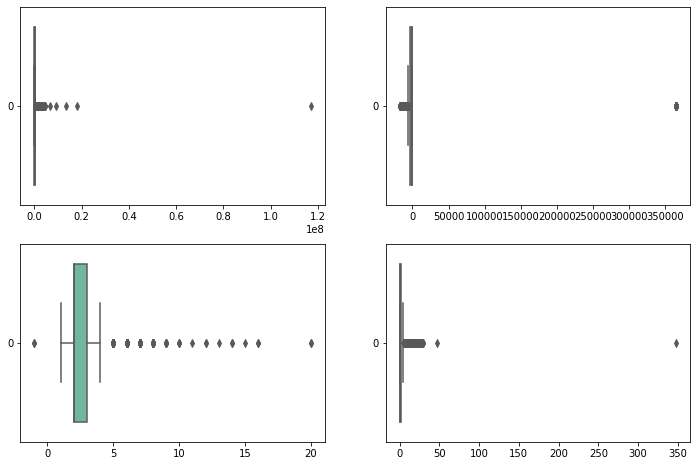

In [45]:
#Draw one dimensional box plots for few columns
draw_box_plots_1d(df, num_cols=['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE'])

#### By looking at the box plots, outliers seems to exist in the following columns
1. AMT_INCOME_TOTAL
2. DAYS_EMPLOYED
3. CNT_FAM_MEMBERS
4. OBS_30_CNT_SOCIAL_CIRCLE


#### Outliers in AMT_INCOME_TOTAL

In [46]:
df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [47]:
df.AMT_INCOME_TOTAL.quantile([0.5,.7,.9,.95, .97, .98, .99, .995, .999, .9999, .99999])

0.50000    1.471500e+05
0.70000    1.800000e+05
0.90000    2.700000e+05
0.95000    3.375000e+05
0.97000    3.825000e+05
0.98000    4.275000e+05
0.99000    4.725000e+05
0.99500    6.300000e+05
0.99900    9.000000e+05
0.99990    2.250000e+06
0.99999    8.831025e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [48]:
#Describe high values 
df[df.AMT_INCOME_TOTAL > 8000000]['AMT_INCOME_TOTAL'].describe()

count    4.000000e+00
mean     3.937502e+07
std      5.188026e+07
min      9.000000e+06
25%      1.237500e+07
50%      1.575004e+07
75%      4.275007e+07
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

##### Handle Outliers in AMT_INCOME_TOTAL:
Total Annual income seeems to be very high for few applicants. They seem to be valid records though for all other values. However, these values may interfere in further ananlysis while takling stats. 99% of values are below  472500. Hence cap the remaining 1 % rows to 0.99 quartile value of 472500.

In [49]:
#Setting the extreme value rows for AMT_INCOME_TOTAL to null
df.loc[df.AMT_INCOME_TOTAL > 472500,'AMT_INCOME_TOTAL'] = 472500

In [50]:
#Inspect the values after capping
df.AMT_INCOME_TOTAL.describe()

count    307511.000000
mean     166025.922341
std       83063.469251
min       25650.000000
25%      112500.000000
50%      147150.000000
75%      202500.000000
max      472500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

#### Outliers in DAYS_EMPLOYED

In [51]:
df.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [52]:
df.DAYS_EMPLOYED.quantile([.5,.7,.8,.9])

0.5     -1213.0
0.7      -458.0
0.8      -144.0
0.9    365243.0
Name: DAYS_EMPLOYED, dtype: float64

##### Handle Outliers in DAYS_EMPLOYED: 
Typically, Days Employed should be < 0. There are about 50000 record with a value more than 0 which seems to be missing data. Due to these values, mean of the data set is also coming as positive. Hence set those values to null. 

In [53]:
df.loc[df.DAYS_EMPLOYED>0,'DAYS_EMPLOYED'] = np.NaN

In [54]:
#Check the mean now and you can observe it is negative now
df.DAYS_EMPLOYED.describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [55]:
#Verify the null values after replacing
df.DAYS_EMPLOYED.isnull().sum()

55374

#### Outliers in CNT_FAMILY_MEMBERS

In [56]:
df.CNT_FAM_MEMBERS.value_counts()

 2     158357
 1      67847
 3      52601
 4      24697
 5       3478
 6        408
 7         81
 8         20
 9          6
 10         3
 20         2
 12         2
 14         2
 16         2
-1          2
 11         1
 13         1
 15         1
Name: CNT_FAM_MEMBERS, dtype: int64

##### Handle Outliers in CNT_FAM_MEMBERS:
There are few applicants who had more than 5 family members. These seem to be valid records, hence leavign them as is, they don't seem to make any difference to stats.

#### Outliers in OBS_30_CNT_SOCIAL_CIRCLE

In [57]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
nan        1021
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
29.0          1
28.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

##### Handle Outlier in OBS_30_CNT_SOCIAL_CIRCLE:
There is one record with OBS_30_CNT_SOCIAL_CIRCLE's value as 348 which seems to be way beyond its previous max value of 47. Drop it.

In [58]:
#This will drop one record with 348
df.drop(index=df[df_ad.OBS_30_CNT_SOCIAL_CIRCLE > 47].index,axis=0,inplace=True)

In [59]:
#Inspect the length of dataframe after dropping the value
len(df)

307510

## 2.5 Binning

In [60]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DEFAULT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648,-2120,Laborers,1,0,0,Business Entity Type 3,0.262949,0.139376,2.0,-1134.0,0,1,0,1,YES
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186,-291,Core staff,2,0,0,School,0.622246,NaN,1.0,-828.0,0,1,0,0,NO
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260,-2531,Laborers,1,0,0,Government,0.555912,0.729567,0.0,-815.0,0,0,0,0,NO
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833,-2437,Laborers,2,0,0,Business Entity Type 3,0.650442,NaN,2.0,-617.0,0,1,-1,-1,NO
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311,-3458,Core staff,1,0,0,Religion,0.322738,NaN,0.0,-1106.0,0,0,0,0,NO


#### Create a new column for total income with Low, Medium, High and Very High ranges

In [61]:
df.loc[:,'TOTAL_INCOME_TYPE'] = df.AMT_INCOME_TOTAL.apply(lambda x : 'Low' if x < 100000 
                                                    else ('Medium' if x < 200000 
                                                          else ('High' if x < 300000 
                                                                else 'Very High') ))

In [62]:
df.TOTAL_INCOME_TYPE.value_counts()

Medium       155898
High          65175
Low           63698
Very High     22739
Name: TOTAL_INCOME_TYPE, dtype: int64

In [63]:
#Inspect the columns after assigning values
df[['AMT_INCOME_TOTAL','TOTAL_INCOME_TYPE']]

,AMT_INCOME_TOTAL,TOTAL_INCOME_TYPE
0,202500.0,High
1,270000.0,High
2,67500.0,Low
3,135000.0,Medium
4,121500.0,Medium
...,...,...
307506,157500.0,Medium
307507,72000.0,Low
307508,153000.0,Medium
307509,171000.0,Medium
